<div style="background: #000;
            color: #FFF;
            margin: 0px;
            padding: 10px 0px 20px 0px;
            text-align: center; 
                ">
    <h1>Logistic Regression Project</h1>
</div>

### By Juan Peralta

<img src="attachment:86546f93-aa15-44a3-bdb2-4e34340ee9d3.png" width="300" style="margin: 0 auto;">


For this project, we'll be working on the titanic dataset.

**Research Goal: We'd like to classify passengers of the titanic dataset so we could see if there is a way to predict who would have survived.**

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

# Part 1

Read the dataset (located at `../datasets/titanic.csv`) and do some exploratory analysis and data cleansing.

### Things to consider when data cleansing:
* What is some initial info we can obtain about the dataset?
* How many missing entries are in our dataset?
* What rows/columns do not contain enough information to be useful? 
  - A lot of information 
* For columns with nominal data, how many different categories are there? (hint: `df['column'].nunique`)
* For rows missing data, is there a way we can fill in that information using our dataset? 
  - For columns like age: consider plotting the histogram (easy way is `df['age'].hist()`) and checking if the data is normally distributed. If not, consider using `median` age as a replacement for missing data. You can go even further and group by `Pclass` and `Sex` in order to use more specific age values for median.
  - For passengers missing "embarked" data, try checking [this website](https://www.encyclopedia-titanica.org/titanic-survivor/) for the missing data.
  - For cabin, replace missing values with 'M'. You can take this further since upper cabins ('A', 'B', 'C') had a better chance at survival but we'll leave that as an optional task. 

### Things to consider when doing exploratory analysis.
* What is the shape of the dataset?
* What are the mean and median values for different columns? (hint: consider using boxplots to visualize this sort of information)
* What is the distribution of the data? (hint: consider using histograms to visualize this sort of information)
* What are the total numbers for different categories for columns? E.g.  For survived, what are the total numbers of passengers who survived vs who didn't survive? (hint: consider using bar charts to visualize this sort of information).

Column information is as follows:
<table>
  <tr>
    <th>variable</th>
    <th>definition</th>
    <th>key</th>
  </tr>
  <tr>
    <td>PassengerID</td>
    <td>ID given to passenger</td>
    <td></td>
  </tr>
  <tr>
    <td>Survived</td>
    <td>indicator if passenger survived</td>
    <td>0 = No, 1 = Yes</td>
  </tr>
  <tr>
    <td>Pclass</td>
    <td>Ticket Class</td>
    <td>1 = 1st, 2 = 2nd, 3 = 3rd</td>
  </tr>
  <tr>
    <td>Sex</td>
    <td>sex of passenger</td>
    <td></td>
  </tr>
  <tr>
    <td>Age</td>
    <td>age of passenger in years</td>
    <td></td>
  </tr>
  <tr>
    <td>Sibsp</td>
    <td># of passenger's siblings/spouses aboard</td>
    <td></td>
  </tr>
  <tr>
    <td>Parch</td>
    <td># of passenger's parents/children aboard</td>
    <td></td>
  </tr>
  <tr>
    <td>Ticket</td>
    <td>ticket number</td>
    <td></td>
  </tr>
  <tr>
    <td>Fare</td>
    <td>fare paid by passenger</td>
    <td></td>
  </tr>
  <tr>
    <td>Cabin</td>
    <td>cabin number</td>
    <td></td>
  </tr>
  <tr>
    <td>Embarked</td>
    <td>port of embarkation</td>
    <td>C = Cherbourg, Q = Queenstown, S = Southampton</td>
  </tr>
</table>

In [2]:
df = pd.read_csv('../datasets/titanic.csv')

In [4]:
print(df.shape)
df.head()

(891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
#Missing Values:
print('=====Columns and Missing Values=======')
print ("Columns  : " ,df.shape[1])
print(dict(zip(df.columns.tolist(), df.isnull().sum().values)))

=====Columns and Missing Values=======
Columns  :  12
{'PassengerId': 0, 'Survived': 0, 'Pclass': 0, 'Name': 0, 'Sex': 0, 'Age': 177, 'SibSp': 0, 'Parch': 0, 'Ticket': 0, 'Fare': 0, 'Cabin': 687, 'Embarked': 2}


* Age has 177 missing values
* Cabin has 687 missing values
* Embarked has 2 missing values
<br>
We will handle the missing values in this order

Median value in Age column is:  28.0
Mode Value Age column is :  0    24.0
dtype: float64


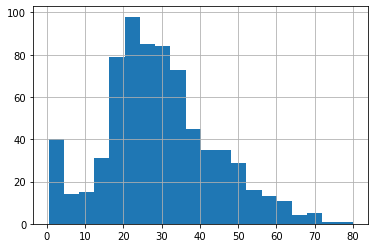

In [6]:
#Age Column
#Finding mean median and mode
df['Age'].hist(bins = 20)
print('Median value in Age column is: ',df['Age'].median())
print('Mode Value Age column is : ',df['Age'].mode())

In [7]:
print(df.groupby(['Pclass','Sex'])['Age'].median())
df.groupby(['Pclass', 'Sex'])['Age'].describe()

Pclass  Sex   
1       female    35.0
        male      40.0
2       female    28.0
        male      30.0
3       female    21.5
        male      25.0
Name: Age, dtype: float64


count       mean        std   min     25%   50%    75%   max
Pclass Sex                                                                 
1      female   85.0  34.611765  13.612052  2.00  23.000  35.0  44.00  63.0
       male    101.0  41.281386  15.139570  0.92  30.000  40.0  51.00  80.0
2      female   74.0  28.722973  12.872702  2.00  22.250  28.0  36.00  57.0
       male     99.0  30.740707  14.793894  0.67  23.000  30.0  36.75  70.0
3      female  102.0  21.750000  12.729964  0.75  14.125  21.5  29.75  63.0
       male    253.0  26.507589  12.159514  0.42  20.000  25.0  33.00  74.0

In [8]:
#Inputing Age column with median value
df['Age'] = df['Age'].fillna(int(df['Age'].median()))

In [9]:
#Cabin Column
df['Cabin'].nunique()

147

In [10]:
#Dropping the cabin column
df['Cabin'] = df['Cabin'].fillna('M')

In [11]:
#Embarked Column
df[df['Embarked'].isnull() == True]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [13]:
df.loc[61,'Embarked'] = 'S'
df.loc[829,'Embarked'] = 'S'

### Exploratory Analysis

In [15]:
print ("Rows     : " ,df.shape[0])
print ("\nUnique values :  \n",df.nunique())

Rows     :  891

Unique values :  
 PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          148
Embarked         3
dtype: int64


In [ ]:
df.info()
df.describe()

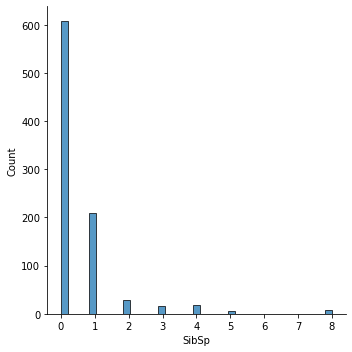

In [19]:
sns.displot(df['SibSp'])
plt.show()

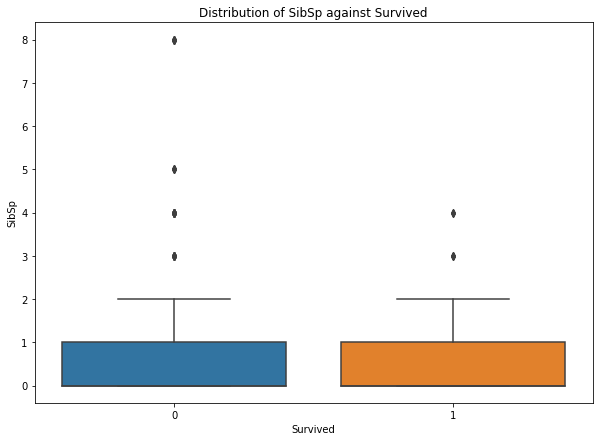

In [20]:
plt.figure(figsize = (10,7))
sns.boxplot(y = df['SibSp'], x = df['Survived'])
plt.title('Distribution of SibSp against Survived')
plt.show()

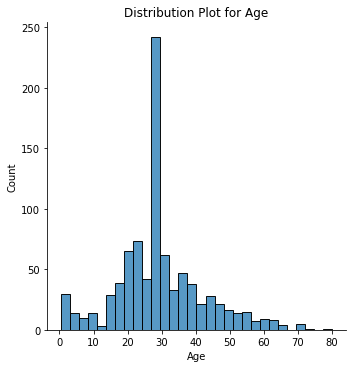

Median Age Value =  28.0


In [21]:
sns.displot(df['Age'])
plt.title('Distribution Plot for Age')
plt.show()
print('Median Age Value = ', df['Age'].median())

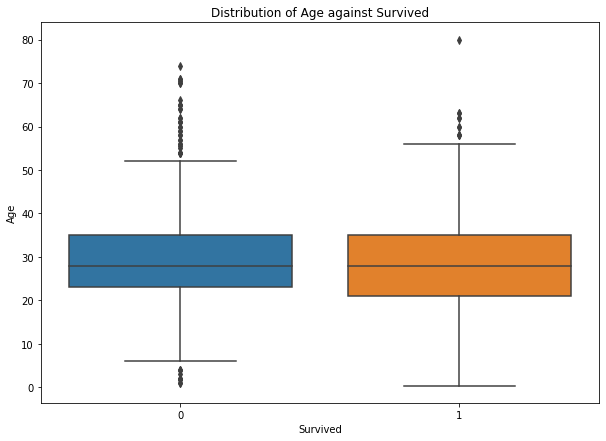

In [22]:
plt.figure(figsize = (10,7))
sns.boxplot(y = df['Age'], x = df['Survived'])
plt.title('Distribution of Age against Survived')
plt.show()

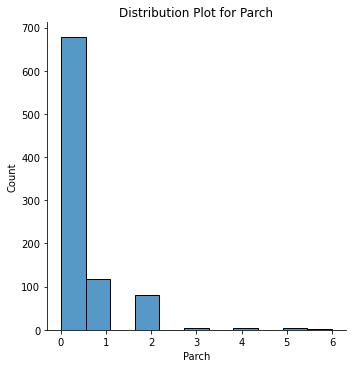

Median Parch Value =  0.0


In [23]:
sns.displot(df['Parch'])
plt.title('Distribution Plot for Parch')
plt.show()
print('Median Parch Value = ', df['Parch'].median())

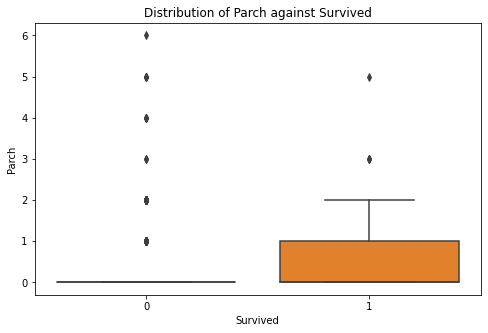

In [24]:
plt.figure(figsize = (8,5))
sns.boxplot(y= df['Parch'], x = df['Survived'])
plt.title('Distribution of Parch against Survived')
plt.show()

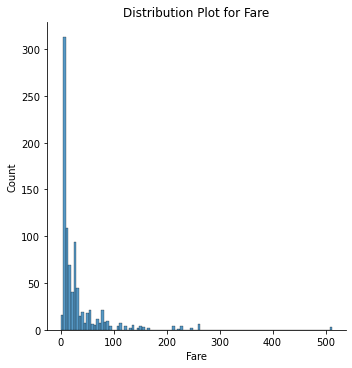

Median Fare Value =  14.4542


In [25]:
sns.displot(df['Fare'])
plt.title('Distribution Plot for Fare')
plt.show()
print('Median Fare Value = ', df['Fare'].median())

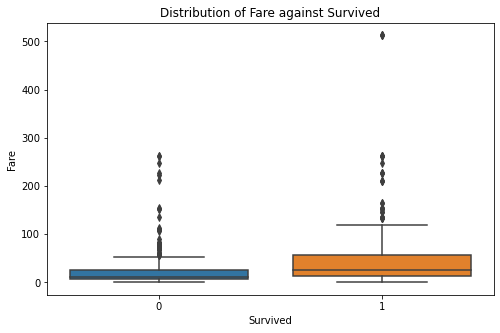

In [26]:
plt.figure(figsize = (8,5))
sns.boxplot(x = df['Survived'], y = df['Fare'])
plt.title('Distribution of Fare against Survived')
plt.show()

##### Categorical Columns

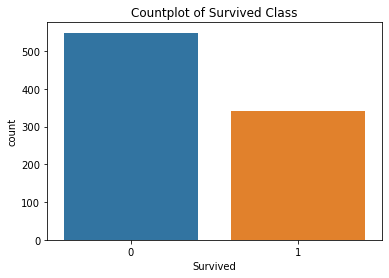

In [27]:
sns.countplot(x = df['Survived'])
plt.title('Countplot of Survived Class')
plt.show()

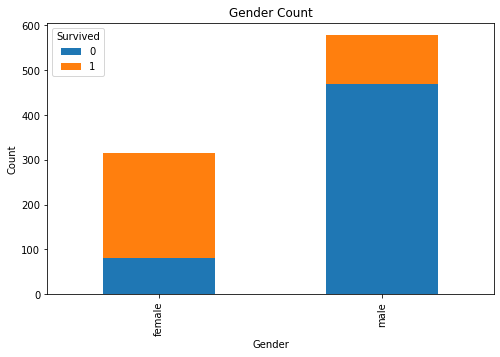

In [28]:
ctab = pd.crosstab(df['Sex'], df['Survived'])
severity = list(ctab.index.values)


ctab.plot.bar(stacked = True, figsize = (8,5))
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender Count')
plt.show()

In [30]:
#Feature Engineering Cabin Column-
# Created new column - Cabin_mod to store prefixes of cabin number
def pref(x):
    return x[0]
df['Cabin_mod'] = df['Cabin'].apply(lambda x: pref(x))

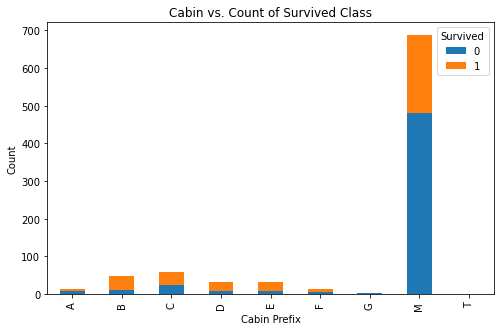

In [31]:
ctab = pd.crosstab(df['Cabin_mod'], df['Survived'])
severity = list(ctab.index.values)


ctab.plot.bar(stacked = True, figsize = (8,5))
plt.xlabel('Cabin Prefix')
plt.ylabel('Count')
plt.title('Cabin vs. Count of Survived Class')
plt.show()

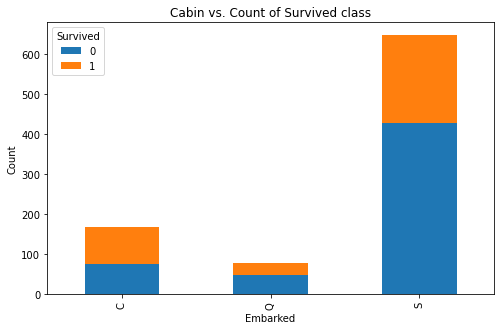

In [32]:
ctab = pd.crosstab(df['Embarked'], df['Survived'])
severity = list(ctab.index.values)


ctab.plot.bar(stacked = True, figsize = (8,5))
plt.xlabel('Embarked')
plt.ylabel('Count')
plt.title('Cabin vs. Count of Survived class')
plt.show()

# Part 2

### Prepare our data for our logistic regression.
* Do one-hot encodings for our nominal data. One-Hot Encoding is a fancy way of turning nominal data (data that is categorical) into numerical data that we can use.
  - We did this with the heightsandweights dataset when we turned converted values for `Sex` into `0`s and `1`s. We must do it again for the `Sex` column in this dataset. 
  - For `Pclass`, make a one-hot-encoding for each passenger class (meaning created a column for 1st class and the values for that column should be 1 if the passenger was in 1st class or 0 otherwise). Do this for each possible value of `Pclass`.
* Remove columns that contain non-numerical data that we cannot use for our logistic regression.
* Make some initial charts to try to find relationships in our data to see if our logistic regression could work (doesn't always show 


In [33]:
#One-hot encoding Pclass
df = pd.get_dummies(df,prefix = ['Pclass'], columns = ['Pclass'])

In [34]:
#One-hot encoding Embarked
df = pd.get_dummies(df, prefix = ['Embarked'], columns = ['Embarked'])

In [35]:
from sklearn.preprocessing import OrdinalEncoder
ord_enc = OrdinalEncoder()
df["Sex"] = ord_enc.fit_transform(df[["Sex"]])

In [36]:
#Removing Name
df.drop(columns = ['Name', 'PassengerId', 'Cabin', 'Ticket', 'Cabin', 'Cabin_mod'], inplace = True)

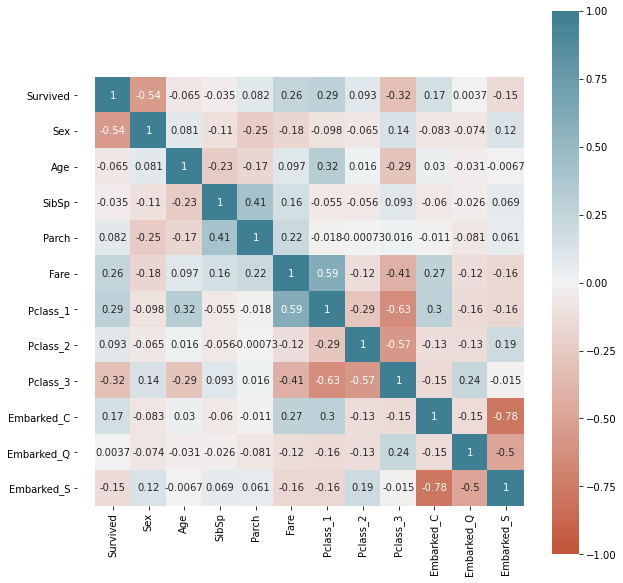

In [37]:
#Correlation amongst Numerical columns
corr = df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True, annot=True)
plt.xticks(rotation = 90)
plt.xlim(-0.5, 12)
plt.ylim(12, -0.5)
plt.show()

# Part 3 

### Doing our logistic regression
* For our LogReg, we can use all of the columns (after fixing them in the previous two parts) that contain numerical data. You can choose to use more or less if it improves your results. (hint: numerical columns, after clean up, could be `['Age', 'Sibsp', 'Parch', 'Fare', 'Sex', '1st Class', '2nd Class', '3rd Class']`)
* Make those columns from the previous bulletpoint be our Independent Variable
* For our dependent variable, use the column 'Survived'
* Once your `X`/`Y` values are figured  out, break your data up into training/test data using `train_test_split` and use 20% as test data. You will then have four variables with data (e.g. `X_train`, `x_test`, `Y_train` and `Y_test`) 
* Create an instance of the `LogisticRegression` class.
* Fit your logistic regression using the training data and that object from the previous bulletproof.
* Once a logistic regression is fitted, use the `x_test` values to generate predicted values of Y.
* Then use those predicted values of Y with the actual values of Y (`Y_test`) to generate a confusion matrix, a classification report, and the following metrics:
  - accuracy score
  - precision score
  - recall score
* Use any and all charts you're able to create to visualize your results (hint: you can use `sns.heatmap` to generate a visualization of the confusion matrix).

In [38]:
#Separating X and Y columns
x_cols = [col for col in df.columns if col not in ['Survived']]
X= df[x_cols]
Y = df['Survived']

In [39]:
#Split into Train and Test Sets
X_train, X_test, y_train, y_test = train_test_split(X,Y, random_state =111, train_size = 0.8, test_size = 0.2)

In [42]:
from sklearn.linear_model import LinearRegression
log_reg = LinearRegression()

In [43]:
log_reg.fit(X_train, y_train)

LinearRegression()

In [48]:
y_pred = log_reg.predict(X_test)

In [49]:
score = log_reg.score(X_test,y_test)
print('Accuracy Score is : ', score)

Accuracy Score is :  0.35135951330789317


In [ ]:
classification_report(y_test, y_pred, output_dict = True)

In [ ]:
#Confusion Matrix
conf_matrix = confusion_matrix(y_test, log_reg.predict(X_test))
sns.heatmap(conf_matrix,square = True, annot = True, fmt = '.0f')
plt.title('Confusion Matrix')

In [ ]:
print('Precision Score is ',precision_score(y_test, y_pred))
print ('Recall Score is ',recall_score(y_test,y_pred))